# 확인학습
- 당뇨병 진행도 예측

In [16]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
dia = load_diabetes()
dir(dia)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [58]:
df = pd.DataFrame(dia.data, columns=dia.feature_names)
df['target'] = dia.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## 특성공학을 하지 않고 MSE를 고려했을 때

In [64]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dia.data, dia.target, random_state = 42)
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
train_prec = lr.predict(X_train)
test_prec = lr.predict(X_test)
print(mean_squared_error(y_train, train_prec))
print(mean_squared_error(y_test, test_prec))

2907.2577640101085
2848.3106508475053


In [67]:
# Lasso
from sklearn.linear_model import Lasso

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_list = []
test_list = []

for i in alpha_list :
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    train_prec = lasso.predict(X_train)
    test_prec = lasso.predict(X_test)
    train_list.append(mean_squared_error(y_train, train_prec))
    test_list.append(mean_squared_error(y_test, test_prec))

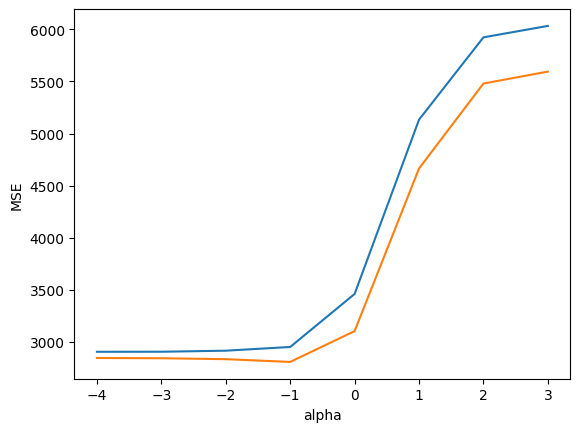

In [76]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [74]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
train_prec = lasso.predict(X_train)
test_prec = lasso.predict(X_test)
print(mean_squared_error(y_train, train_prec), mean_squared_error(y_test, test_prec))

2907.259582946288 2848.070281410895


In [71]:
# Ridge
from sklearn.linear_model import Ridge

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_list = []
test_list = []

for i in alpha_list :
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    train_prec = ridge.predict(X_train)
    test_prec = ridge.predict(X_test)
    train_list.append(mean_squared_error(y_train, train_prec))
    test_list.append(mean_squared_error(y_test, test_prec))

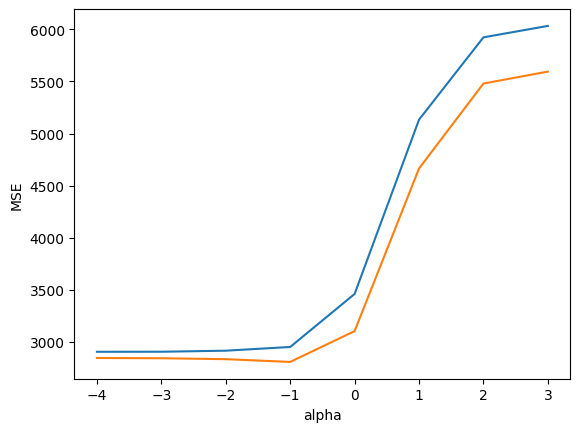

In [77]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [75]:
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train, y_train)
train_prec = ridge.predict(X_train)
test_prec = ridge.predict(X_test)
print(mean_squared_error(y_train, train_prec), mean_squared_error(y_test, test_prec))

2907.263533685976 2847.9581782085475


# 특성공학을 하였을 때

In [28]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dia.data, dia.target, random_state = 42)
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train),lr.score(X_test, y_test))

0.519034189167905 0.4849058889476756


In [29]:
# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(X_train)
test_poly = poly.fit_transform(X_test)

lrr = LinearRegression()
lrr.fit(train_poly, y_train)
print(lrr.score(train_poly, y_train), lrr.score(test_poly, y_test))

0.6048153298370548 0.4242419459459511


In [32]:
# Lasso
from sklearn.linear_model import Lasso

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_list = []
test_list = []

for i in alpha_list :
    lasso = Lasso(alpha = i)
    lasso.fit(train_poly, y_train)
    train_list.append(lasso.score(train_poly, y_train))
    test_list.append(lasso.score(test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.129e+05, tolerance: 2.001e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+05, tolerance: 2.001e+02
  model = cd_fast.enet_coordinate_descent(


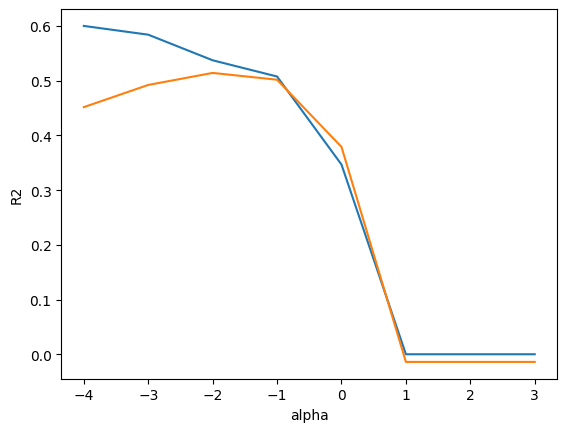

In [33]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [39]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_poly, y_train)
print(lasso.score(train_poly, y_train), lasso.score(test_poly, y_test))

0.507826468555518 0.5019753487835406


In [40]:
# Ridge
from sklearn.linear_model import Ridge

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_list = []
test_list = []

for i in alpha_list :
    ridge = Ridge(alpha = i)
    ridge.fit(train_poly, y_train)
    train_list.append(ridge.score(train_poly, y_train))
    test_list.append(ridge.score(test_poly, y_test))

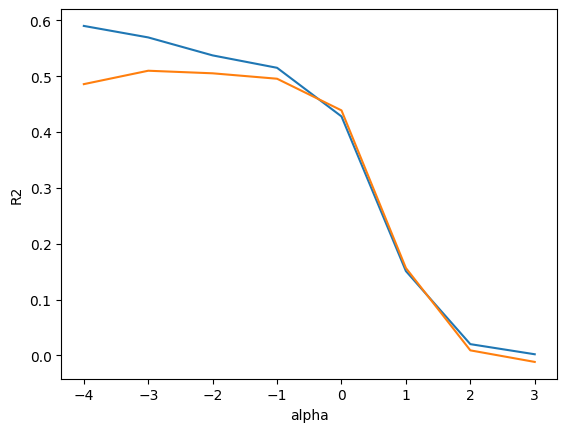

In [41]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [42]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_poly, y_train)
print(ridge.score(train_poly, y_train), ridge.score(test_poly, y_test))

0.5149371236445714 0.49537663053177605
